# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("adult.data.txt", header=None, skipinitialspace=True)
names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", 
       "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]
df.columns = names
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Вопрос 1
Сколько мужчин и женщин в выборке?

In [3]:
set(df.sex)

{'Female', 'Male'}

In [4]:
print(' Number of women in the sample is', df.groupby('sex').count().loc['Female'][0], '\n',
      'Number of men in the sample is', df.groupby('sex').count().loc['Male'][0])

 Number of women in the sample is 10771 
 Number of men in the sample is 21790


### Вопрос 2
Каков средний возраст мужчин?


In [5]:
print('Average age of men in the sample is %.2f' %df.groupby('sex').mean()['age'].loc['Male'])

Average age of men in the sample is 39.43


### Вопрос 3
Какова доля граждан США?

In [6]:
print('Share of citizens of the USA is', round(df.groupby('native-country').count().loc['United-States'][0]/df.shape[0], 3))

Share of citizens of the USA is 0.896


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

In [7]:
set(df.education)

{'10th',
 '11th',
 '12th',
 '1st-4th',
 '5th-6th',
 '7th-8th',
 '9th',
 'Assoc-acdm',
 'Assoc-voc',
 'Bachelors',
 'Doctorate',
 'HS-grad',
 'Masters',
 'Preschool',
 'Prof-school',
 'Some-college'}

Задаём порядок уровней образования, чтобы распределение было правильно визуализировано. 

In [8]:
order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th', 'HS-grad', 'Prof-school', 
         'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']

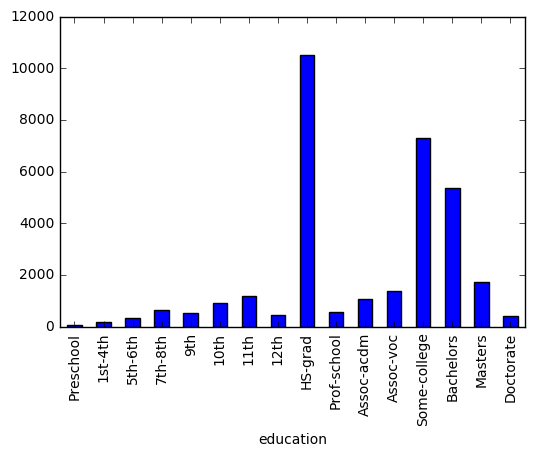

In [9]:
df.groupby('education').count()['age'].ix[order].plot.bar()

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей.

In [4]:
print(' Mean final weight among unmarried is %.f;' %df.groupby('marital-status').mean()['fnlwgt'].loc['Divorced'], '\n',
      'Standard deviation of final weight among unmarried is %.f' %df.groupby('marital-status').std()['fnlwgt'].loc['Divorced'])

 Mean final weight among unmarried is 185803; 
 Standard deviation of final weight among unmarried is 105647


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

In [11]:
wage_50 = pd.DataFrame(df.groupby(['50K','education']).count()['age'])
wage_50.columns = ['Number of people']
wage_50.loc['>50K']

,Number of people
education,
10th,62
11th,60
12th,33
1st-4th,6
5th-6th,16
7th-8th,40
9th,27
Assoc-acdm,265
Assoc-voc,361


In [12]:
higher = wage_50.loc['>50K', 'Bachelors'] + wage_50.loc['>50K', 'Masters'] + wage_50.loc['>50K', 'Doctorate']
share = round(int(higher)/wage_50.loc['>50K']['Number of people'].sum(), 3)
print('Share of people with higher education among those who has wage >50K is', share)

Share of people with higher education among those who has wage >50K is 0.445


Неправда, так как доля людей с высшим образованием среди тех, кто зарабатывает больше 50К, меньше половины.

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [13]:
max_age = pd.DataFrame(df.groupby(['sex', 'race'])['age'].nlargest(1))
max_age.reset_index(level=2, drop=True)

age
sex    race                   
Female Amer-Indian-Eskimo   80
       Asian-Pac-Islander   75
       Black                90
       Other                74
       White                90
Male   Amer-Indian-Eskimo   82
       Asian-Pac-Islander   90
       Black                90
       Other                77
       White                90

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [14]:
countries = list(set(df[df.occupation == 'Farming-fishing']['native-country']))
countries.remove('?')
print(countries)

['Japan', 'Mexico', 'Philippines', 'Portugal', 'Hong', 'Italy', 'Ireland', 'Canada', 'France', 'El-Salvador', 'Guatemala', 'Cambodia', 'Cuba', 'United-States', 'Poland', 'Yugoslavia', 'Germany', 'Puerto-Rico', 'Vietnam', 'England']


### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [15]:
count = pd.DataFrame(df.groupby(['sex', 'education']).count()['age'])
count.columns = ['Number of people']
count.head()

Number of people
sex    education                  
Female 10th                    295
       11th                    432
       12th                    144
       1st-4th                  46
       5th-6th                  84

In [16]:
rel_1 = int(count.loc['Male', 'Bachelors'])/int(count.loc['Male', 'Masters'])
rel_2 = int(count.loc['Female', 'Bachelors'])/int(count.loc['Female', 'Masters'])

print(' Relationship of the number of men-bachelors to the number of men-masters is %.3f' %rel_1, '\n',
      'Relationship of the number of women-bachelors to the number of women-masters is %.3f' %rel_2)
print(' -------------------------------------------------------------------------------------')
print(' ')


if rel_1 > rel_2:
    print(' Relationship of the number of men-bachelors to the number of men-masters is higher')
else: 
    print(' Relationship of the number of women-bachelors to the number of women-masters is higher')

 Relationship of the number of men-bachelors to the number of men-masters is 3.147 
 Relationship of the number of women-bachelors to the number of women-masters is 3.021
 -------------------------------------------------------------------------------------
 
 Relationship of the number of men-bachelors to the number of men-masters is higher


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [17]:
print('Maximum number of working hours per week is', df['hours-per-week'].max())

Maximum number of working hours per week is 99


In [18]:
print(df[df['hours-per-week'] == 99].shape[0], 'people work 99 hours per week')

85 people work 99 hours per week


In [19]:
count = df[df['hours-per-week'] == 99].groupby('50K').count()
count.rename(columns={'age':'Number of people'}, inplace=True)
pd.DataFrame(count['Number of people'])

,Number of people
50K,
<=50K,60
>50K,25


60 людей из тех, кто работает 99 часов в неделю, зарабатывают меньше 50К, 25 - больше 50К.